<a href="https://colab.research.google.com/github/alevsandra/Natural-language-processing/blob/main/Pjn_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Polecenie
1. Utworzyć korpus wybranych dokumentów tekstowych (co najmniej 7 dokumentów), pochodzących z 3 różnych działów (np. ekonomia, sport, polityka, motoroyzacja etc.

2. Zbudować macierz DTM (Document Term Matrix) wykorzystując formy podstawowe słów.

3. Wyodrębnić koncepty  z wykorzystaniem SVD:

  a) wyznaczyć macierze U, S, V.

  b) Przedstawić w postaci chmury tagów słowa należące do każdego tematu (wielkość słowa powinna odpowiadać sile związku słowa z tematem)

  c) przedstawić w postaci wykresu radarowego tematy każdego z dokumentów 

###Tworzenie korpusu

In [75]:
import urllib.request
from bs4 import BeautifulSoup
def open_book(url):
  file = urllib.request.urlopen(url)
  file = file.read().decode('utf-8')
  soup = BeautifulSoup(file, 'html.parser')
  content = ""
  for data in soup.find_all("p"):
    if not data.get_text().isspace():
      content = content + data.get_text() + "\n"
  return content

Za pomocą własnej funkcji wydobywam tekst ze stron z artykułami poprzez ***html.parser*** i wyciąganie jedynie treści ze znaczników < p >.

In [157]:
urls = ["https://www.money.pl/gospodarka/ostatni-dzwonek-dla-mlodych-ratunkiem-kredyt-bez-wkladu-wlasnego-6711051136334464a.html", 
        "https://businessinsider.com.pl/twoje-pieniadze/kredyt-bez-wkladu-wlasnego-deweloperzy-i-posrednicy-nie-wroza-sukcesu/zwygb8j",
        "https://www.komputerswiat.pl/aktualnosci/wydarzenia/zacmienie-ksiezyca-19-listopada-2021-bedzie-najdluzsze-w-tym-stuleciu/f5ydyq2",
        "https://nauka.poinformowani.pl/artykul/44084-calkowite-zacmienie-slonca-jedyne-takie-w-2021-roku",
        "https://www.vogue.pl/a/crocs-x-balenciaga-te-buty-podzielily-internautow",
        "https://www.vogue.pl/a/trendy-2021-wielki-powrot-crocsow",
        "https://www.vogue.pl/a/crocsy-najmodniejszymi-butami-sezonu-sceptyczna-jest-victoria-beckham"]

corpus = []
# topics = ["ekonomia", "ekonomia", "nauka", "nauka", "moda", "moda", "moda"]
for url in urls:
  corpus.append(open_book(url))

###Przygotowanie środowiska

In [77]:
!pip install spacy==2.3.0
!python -m spacy download pl_core_news_sm

     |████████████████████████████████| 48.7 MB 1.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_sm')


###Macierz DTM

In [113]:
stoplist = urllib.request.urlopen("https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt")
stoplist = stoplist.read().decode('utf-8').splitlines()

Tworzę stoplistę z przygotowanego pliku txt.

In [79]:
import spacy
nlp = spacy.load("pl_core_news_sm")

Ładowanie polskiego taggera z biblioteki <font color='gold'>***spacy***</font>.

In [80]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    output = ""
    doc = nlp(text)
    for token in doc:
      if token.tag_ not in ['X', 'INTERP', '_SP', 'BREV']:
        output = output + token.lemma_ + " "
    return output

Dokonuje preprocessingu tekstów, aby pozbyć się z nich liczb, ujednolicić wielkość liter oraz sprowadzić do formy podstawowej.

In [158]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=stoplist, preprocessor=preprocess_text)
dtm = vectorizer.fit_transform(corpus).toarray()

print(dtm)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cal', 'czas', 'miedza', 'mieć', 'możliwy', 'musić', 'móc', 'nica', 'rok', 'swój', 'wszystek', 'zostać'] not in stop_words.
  % sorted(inconsistent)


[[0 0 0 ... 0 0 0]
 [1 0 0 ... 1 1 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Za pomocą biblioteki <font color='gold'>***sklearn***</font> tworzę DTM.

###SVD

In [159]:
import numpy as np

u, s, vh = np.linalg.svd(dtm)

print("Macierz U:\n", u)
print("Macierz S:\n", s)
print("Macierz V:\n", vh)

Macierz U:
 [[-0.26442561  0.17968397 -0.13342949 -0.93607096 -0.04195389  0.04396523
   0.00821136]
 [-0.95022933 -0.21478369  0.04477897  0.21904906  0.02613833 -0.01029287
  -0.01246525]
 [-0.02222503  0.07836359 -0.53952821  0.14180474 -0.12521618  0.81549152
  -0.03821522]
 [-0.03386678  0.14011883 -0.80546286  0.12232155  0.06662037 -0.55723354
   0.02322236]
 [-0.04120799  0.18461305  0.06025085  0.06838521 -0.89223124 -0.14534517
  -0.37243982]
 [-0.14850445  0.91440807  0.18680556  0.18028517  0.25473811  0.03517568
  -0.09097485]
 [-0.04184173  0.15994815  0.04247132  0.05948314 -0.34127877 -0.0079328
   0.9223826 ]]
Macierz S:
 [65.14586367 40.57062552 28.70305291 26.26128118 18.11033499 17.06794526
 12.65786975]
Macierz V:
 [[-1.45861806e-02 -2.27956840e-03 -3.41157909e-04 ... -1.45861806e-02
  -1.45861806e-02 -5.19860850e-04]
 [-5.29406892e-03  2.25386731e-02  1.93153527e-03 ... -5.29406892e-03
  -5.29406892e-03  3.45370137e-03]
 [ 1.56007696e-03  6.50821224e-03 -1.8796893

Za pomocą funkcji z biblioteki <font color='gold'>***numpy***</font> tworzę macierze U, S, V.

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def build_wordcloud(d):
  wordcloud = WordCloud(background_color ='white', min_font_size = 10).generate_from_frequencies(dict(d))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

W oparciu o bibliotekę <font color='gold'>***matplotlib***</font> oraz <font color='gold'>***wordcloud***</font> tworzymy wordcloud.

In [163]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 3)
tdm_tranformed = svd.fit_transform(dtm)

print(tdm_tranformed)
print(svd.components_.shape)

[[17.22623476  7.2898912   3.82983366]
 [61.90351056 -8.71390857 -1.28529319]
 [ 1.44786856  3.17926003 15.48610687]
 [ 2.2062809   5.68470838 23.11924322]
 [ 2.68452991  7.48986675 -1.72938347]
 [ 9.6744508  37.09810721 -5.36188988]
 [ 2.72581593  6.48919661 -1.21905641]]
(3, 1340)


Dokonuje SVD na z podziałem na 3 tematy przy pomocy biblioteki <font color='gold'>***sklearn***</font>.

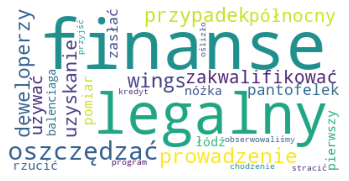

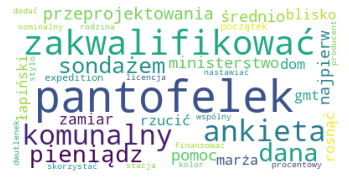

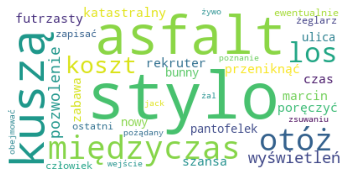

In [164]:
terms = vectorizer.vocabulary_
for i, component in enumerate(svd.components_):
    terms_components = zip(terms, component)
    sorted_terms = sorted(terms_components, key=lambda x:x[1], reverse=True)
    build_wordcloud(sorted_terms)
    print("\n")

Tworzę wordcloudy ze słowami z poszczególnych tematów, zwracając uwagę na znaczenie każdego słowa w kotekście jego wielkości.

In [169]:
import plotly.express as px

for doc in tdm_tranformed:
  fig = px.line_polar(r = doc, theta=['ekonomia', 'moda', 'nauka'], line_close=True)
  fig.show()

Za pomocą biblioteki <font color='gold'>***plotly***</font> tworzę wykres radarowy przedstawiający tematy dla każdego z dokumentów.